In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np                                                   
import matplotlib.pyplot as plt                                                              
from sklearn.datasets import make_blobs #  إستيراد دالة لإنشاءالبيانات

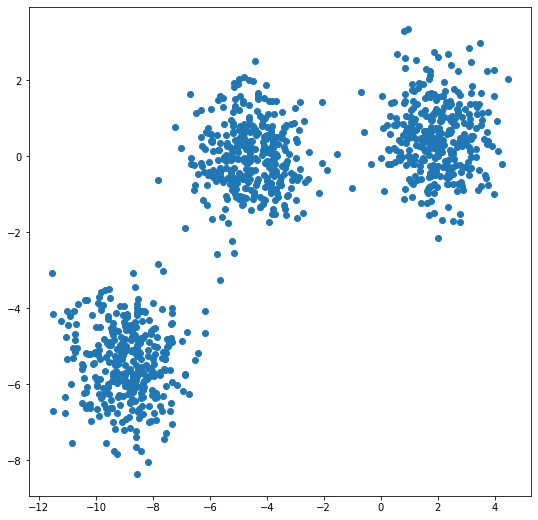

In [3]:
plt.figure(figsize=(9, 9))                                        #  ضبط مقاسات الرسم البياني

n_samples = 1000                                                  #   عدد العيانات
random_state = 170                                                #   اعداد اختيار العينات عشوائيا
X, y = make_blobs(n_samples=n_samples, random_state=random_state) #   انشاء قاعدة بيانات عشوائية
plt.scatter(X[:, 0], X[:, 1])


Text(0.5, 1.0, 'Incorrect Number of Blobs')

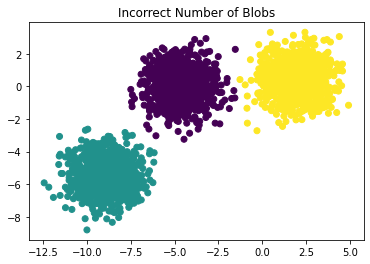

In [ ]:
from sklearn.cluster import KMeans 
k_mean= KMeans(n_clusters=3, random_state=random_state)
k_mean.fit(X)
y_pred= k_mean.predict(X)
plt.subplot(111)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

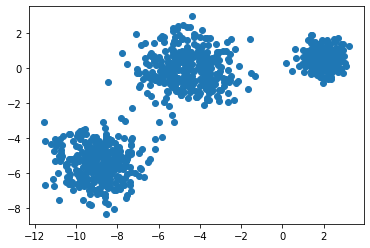

In [ ]:
n_samples = 1000                                               
random_state = 170  
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1, 1.2, 0.5],
                                random_state=random_state)
plt.subplot(111)
plt.scatter(X_varied[:, 0], X_varied[:, 1])

Text(0.5, 1.0, 'Incorrect Number of Blobs')

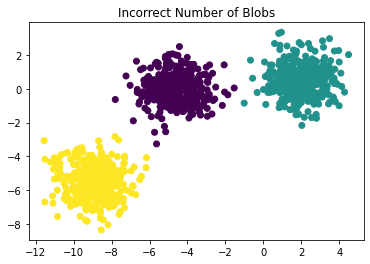

In [ ]:
from sklearn.cluster import KMeans 
k_mean= KMeans(n_clusters=3, random_state=random_state)
k_mean.fit(X)
pred_y= k_mean.predict(X)
plt.subplot(111)
plt.scatter(X[:, 0], X[:, 1], c=pred_y)
plt.title("Incorrect Number of Blobs")

In [ ]:
print('KMeansModel Train Score is : ' , k_mean.score(X))

KMeansModel Train Score is :  -33.997528913737966


# **Example 2**

In [ ]:
# creating data
import numpy as np
X = np.random.rand(10000,2)
y = np.random.rand(10000,0)
#Splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)
#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)



X_train shape is  (6700, 2)
X_test shape is  (3300, 2)
y_train shape is  (6700, 0)
y_test shape is  (3300, 0)


In [ ]:
from sklearn.cluster import KMeans
km= KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=33)
km.fit(X_train)
print('KMeansModel Train Score is : ' , km.score(X_train))
print('KMeansModel Test Score is : ' , km.score(X_test))
print('KMeansModel centers are : ' , km.cluster_centers_)


KMeansModel Train Score is :  -237.991110598741
KMeansModel Test Score is :  -118.31986869221282
KMeansModel centers are :  [[0.24194543 0.24404213]
 [0.73034976 0.84164541]
 [0.76489237 0.16381931]
 [0.72923995 0.50094035]
 [0.23132955 0.74674852]]


In [ ]:
#Calculating Prediction
print(X_test [:10])
y_pred = km.predict(X_test)
print('Predicted Value for KMeansModel is : ' , y_pred[:10])


[[0.95181498 0.1671516 ]
 [0.79329722 0.05006506]
 [0.58052703 0.99633402]
 [0.29196223 0.79449268]
 [0.37897927 0.95482715]
 [0.65886028 0.5005196 ]
 [0.10961584 0.66151165]
 [0.48877462 0.11162782]
 [0.90733604 0.89220337]
 [0.47448366 0.21438215]]
Predicted Value for KMeansModel is :  [2 2 1 4 4 3 4 0 1 0]


# **Example 3**
There is a dataset contains data of 200 customers of a mall. The dataset includes the customerID, genre, age, annual income and spending score of each customer. Spending score is a score computed for each of mall’s clients based on several criteria including, for instance, their income, the number of times per week they come to the mall and the money they spent in a year. This score is between 1–100. Our target in this model will be to divide the customers into a reasonable number of segments and determine the segments of the mall customers.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
#2 Importing the mall dataset
dataset= pd.read_csv('/content/drive/MyDrive/sklearn/Mall_Customers.csv')
print(dataset.head())
#Select the annual income and the spending score columns X=dataset.iloc[:, [3,4]].values
X=dataset.iloc[:, [3,4]].values
print(X.shape)
print(X[:5])

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
(200, 2)
[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


#  **Elbow** method is one of the robust one used to find out the optimal number of clusters
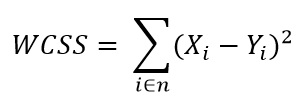

In [10]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
'''
# i above is between 1-10 numbers. parameter is the random
# initialization method we select kmeans++ method.
# max_iter parameter the maximum number of iterations there can be to 
find the final clusters when the K-meands algorithm is running.
'''
#kmeans inertia_ attribute is:  Sum of squared distances of samples to their closest cluster center.
wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30259.65720728547,
 25011.839349156588,
 21850.165282585636,
 19672.072849014323]

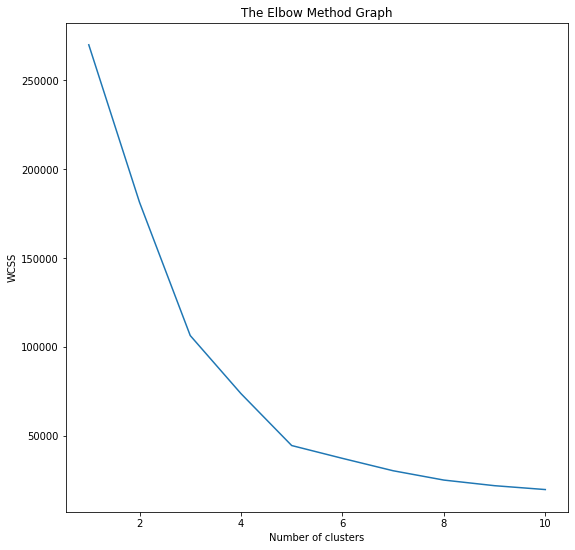

In [11]:
plt.figure(figsize=(9, 9))                                        #  ضبط مقاسات الرسم البياني

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
# According to the Elbow graph we deterrmine the clusters number as 5

In [12]:
#  Applying k-means algorithm to the X dataset
kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [13]:
X[y_kmeans==0, 1] # Cluster 1 with coulmn 2

array([29, 11,  9,  5,  7, 10,  5, 12, 36, 22, 17, 20, 16,  1,  1, 35,  5,
       26, 20, 27, 13, 10, 13, 15, 14, 32, 15, 39, 24, 17, 23,  8, 16, 28,
       18])

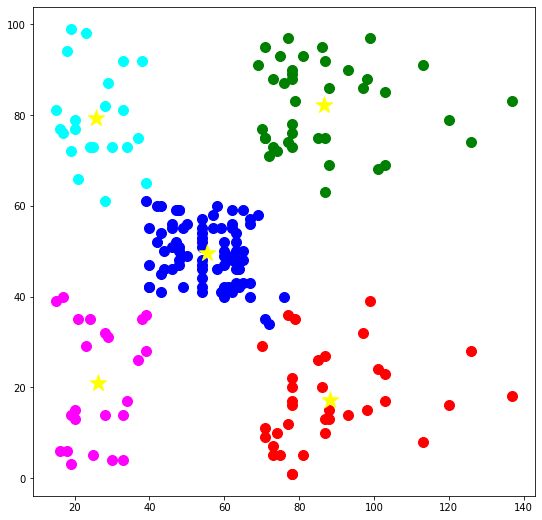

In [14]:
plt.figure(figsize=(9, 9))  
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],marker='*', s=300, c='yellow', label = 'Centroids')

# **Example 4**

In [15]:
from sklearn.datasets import load_iris
df_iris= load_iris()
X= df_iris.data
y= df_iris.target
import seaborn as sns
import pandas as pd
X=pd.DataFrame(X)
y=pd.DataFrame(y)
df_iris=pd.concat([X,y],axis=1)
df_iris.head()


,0,1,2,3,0
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
X= df_iris.iloc[:,[0,1,2,3]].values
X[0:5,0:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [17]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#kmeans inertia_ attribute is:  Sum of squared distances of samples to their closest cluster center.
wcss

[681.3706,
 152.3479517603579,
 78.851441426146,
 57.22847321428572,
 46.446182051282065,
 39.03998724608726,
 34.46949589883801,
 30.1865551948052,
 28.28937085137085,
 26.552373141564317]

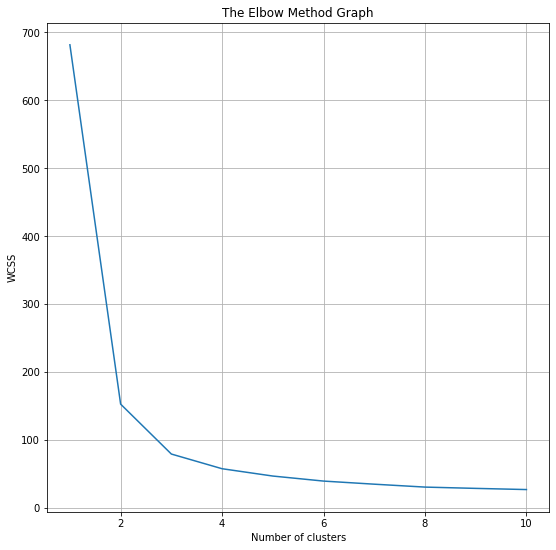

In [19]:
plt.figure(figsize=(9, 9))  
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

# According to the Elbow graph we deterrmine the clusters number as 3

In [20]:
#  Applying k-means algorithm to the X dataset
kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [ ]:
X[y_kmeans==0, 1]

array([3.2, 3.2, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2, 2.9,
       2.9, 3.1, 3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8,
       2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. , 2.5, 2.6,
       3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8, 2.7, 2.5, 2.5, 2.8,
       2.2, 2.8, 2.7, 2.8, 3. , 2.8, 3. , 2.7, 2.5, 3. ])

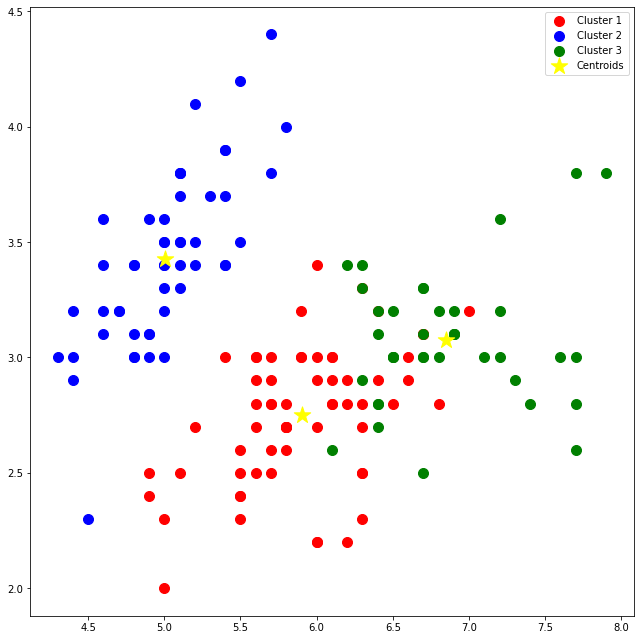

In [21]:
plt.figure(figsize=(9, 9))  
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
#  Here, X[y_kmeans==0,0] is X axis and X[y_kmeans==0,1] is Y axis

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],marker='*', s=300, c='yellow', label = 'Centroids')
plt.legend(scatterpoints=1)
plt.tight_layout()

# **OR**

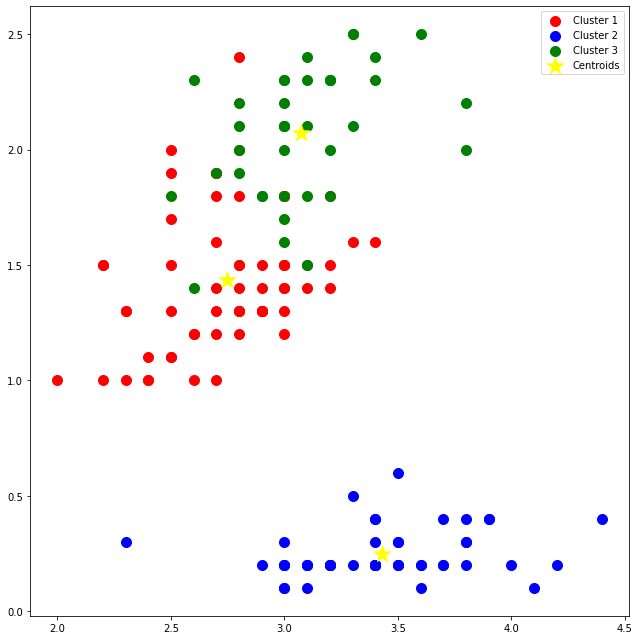

In [22]:
plt.figure(figsize=(9, 9))  
plt.scatter(X[y_kmeans==0, 1], X[y_kmeans==0, 3], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 1], X[y_kmeans==1, 3], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 1], X[y_kmeans==2, 3], s=100, c='green', label ='Cluster 3')
#  Here, X[y_kmeans==0,0] is X axis and X[y_kmeans==0,1] is Y axis

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 3],marker='*', s=300, c='yellow', label = 'Centroids')
plt.legend(scatterpoints=1)
plt.tight_layout()

# **another way**

In [23]:
from sklearn.datasets import load_iris
iris= load_iris()
X= iris.data
names= iris.feature_names
print(names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [24]:
import pandas as pd

X= pd.DataFrame(X)
X.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
X.columns= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


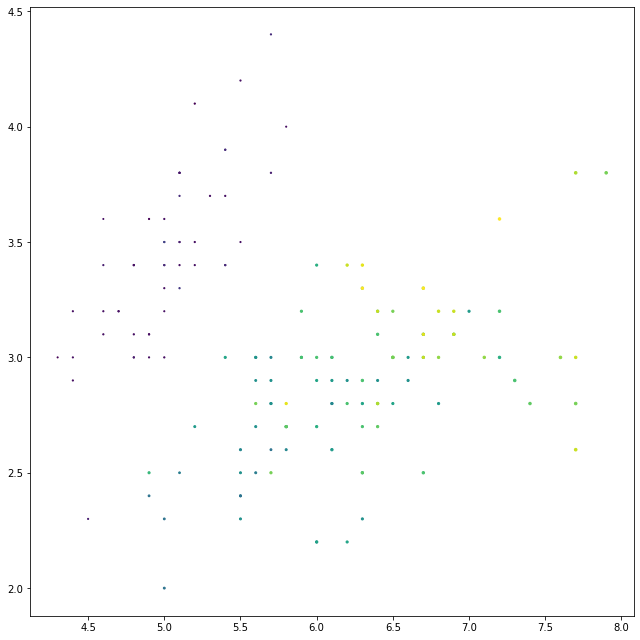

In [28]:
# we note there are three clusters
plt.figure(figsize=(9, 9))  
plt.scatter(X.sepal_length,X.sepal_width,X.petal_length,X.petal_width)
plt.tight_layout()
